In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import seaborn as sb

In [2]:
#loading dataset

df = pd.read_csv('minutes_and_certificates.csv')

In [3]:
df.head()

,student_id,certificates_issued,minutes_watched,Unnamed: 3,Unnamed: 4,Correlation,Unnamed: 6,Unnamed: 7
0,4640,1,586.8000,NaN,NaN,NaN,certificates_issued,minutes_watched
1,5836,3,1903.1167,NaN,NaN,certificates_issued,1,NaN
2,801,13,6066.0000,NaN,NaN,minutes_watched,0.512615134,1
3,2022,1,115.3667,NaN,NaN,NaN,NaN,NaN
4,6278,2,2181.3167,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:,0:3]

In [5]:
df.head()

,student_id,certificates_issued,minutes_watched
0,4640,1,586.8000
1,5836,3,1903.1167
2,801,13,6066.0000
3,2022,1,115.3667
4,6278,2,2181.3167


In [6]:
target = df['certificates_issued']
feature = df['minutes_watched']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=365)

In [8]:
import numpy as np

# Convert to NumPy arrays
X_train = np.array(X_train).reshape(-1, 1)  
X_test = np.array(X_test).reshape(-1, 1)   
y_train = np.array(y_train).reshape(-1, 1)  
y_test = np.array(y_test).reshape(-1, 1)   

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
intercept = model.intercept_[0]
slope = model.coef_[0][0]
r_squared = model.score(X_test, y_test)

# Print the linear regression equation
print(f"Equation: y = {slope:.4f} * x + {intercept:.2f}")

# Print the R-squared value
print(f"R-squared: {r_squared:.2f}")

Equation: y = 0.0017 * x + 1.22
R-squared: 0.41


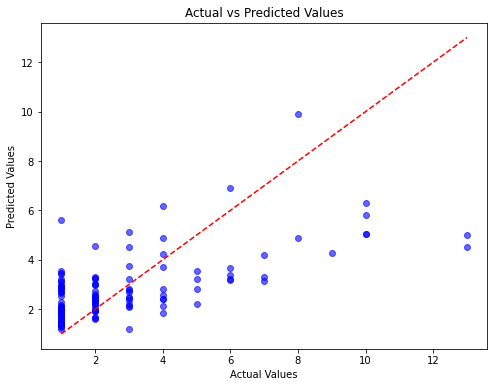

In [12]:
y_pred = model.predict(X_test)  

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plotting a 45-degree line for reference (ideal case where predictions = actuals)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show plot
plt.show()